<a href="https://colab.research.google.com/github/Xiaowei0402/CS229_final_project/blob/main/CS229_FP_training_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# helper function for plotting

In [1]:
def scatter_plot_pred(y_test, y_pred, colorbar = False):
  sortind = np.argsort(y_test)
  plt.scatter(np.asarray(y_test)[sortind],y_pred[sortind],c = np.arange(len(y_test)))
  plt.plot(np.linspace(np.min(y_test), np.max(y_test),100),np.linspace(np.min(y_test), np.max(y_test),100),'r--')
  plt.xlabel('Observed y')
  plt.ylabel('Predicted y')
  if colorbar == True:
    plt.colorbar()

# Import datast

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import sklearn
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/CS229_Final_Project')

In [5]:
# Load information of target strand
filename = 'merged_B2_mNG.csv'
df_input = pd.read_csv(filename)

# Split into train and test dataset (60/20/20)

Don't need to run this again once we have the split

In [6]:
# permute indicies
permuted = np.random.permutation(len(df_input))
df_train = df_input.loc[list(permuted[0:round(len(df_input)*0.7)])]
df_test = df_input.loc[list(permuted[round(len(df_input)*0.7):])]

# Formatting x into matrix and y into vector

In [7]:
def format_input(df, intercept = False, dropcolumns = ['Unnamed: 0','Unnamed: 0.1', 'comp_seq_ind','A_pos','y','delta_y']):
  # for x, drop irrelevant columns, and y
  df_x = df.drop(columns=dropcolumns)
  x = df_x.to_numpy()

  y = list(df['y'])

  return x,y

## getting x-matirx and y, igoring distance to 5 and distance to 3:


In [8]:
x_train, y_train = format_input(df_train)
x_test, y_test = format_input(df_test)

In [9]:
# normalize input data to unit variance
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)

scaler = StandardScaler()
scaler.fit(x_test)
X_test = scaler.transform(x_test)

# Training: Random Forest Regressor

Random forest gives 92% training accuracy

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# use grid search to find the best parameters
forest = RandomForestRegressor(n_estimators=50, criterion="squared_error", random_state = 229)

# set up our search grid
param_grid = {"min_samples_leaf":    [3,5],
              "min_samples_split": [3,5],
              "max_depth": [5,8,10,12,15]}

# try out every combination of the above values
search = GridSearchCV(forest, param_grid, cv=5).fit(X_train, y_train)

In [ ]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.770856,0.435547,0.031699,0.005428,5,3,3,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.618329,0.637253,0.647626,0.622024,0.638786,0.632804,0.010964,17
1,2.594774,0.421087,0.031914,0.004827,5,3,5,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.618329,0.637253,0.647626,0.622024,0.638786,0.632804,0.010964,17
2,2.464267,0.295791,0.031018,0.005065,5,5,3,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.618315,0.637249,0.647641,0.622132,0.638071,0.632682,0.010876,19
3,3.349147,1.822001,0.032703,0.005789,5,5,5,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.618315,0.637249,0.647641,0.622132,0.638071,0.632682,0.010876,19
4,6.097989,2.578668,0.052645,0.011546,8,3,3,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.783159,0.785974,0.809061,0.785919,0.792967,0.791416,0.009400,13
5,4.845824,1.936446,0.045947,0.006411,8,3,5,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.783159,0.785974,0.809061,0.785919,0.792967,0.791416,0.009400,13
6,5.605626,1.011377,0.047950,0.010032,8,5,3,"{'max_depth': 8, 'min_samples_leaf': 5, 'min_s...",0.782093,0.784658,0.807934,0.785137,0.791873,0.790339,0.009373,15
7,5.524754,1.164430,0.084988,0.056012,8,5,5,"{'max_depth': 8, 'min_samples_leaf': 5, 'min_s...",0.782093,0.784658,0.807934,0.785137,0.791873,0.790339,0.009373,15
8,6.442139,1.464127,0.080172,0.034825,10,3,3,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.846124,0.848103,0.869776,0.853426,0.858550,0.855196,0.008480,9
9,4.588246,0.503902,0.054296,0.005555,10,3,5,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.846124,0.848103,0.869776,0.853426,0.858550,0.855196,0.008480,9


In [10]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 5, min_samples_split = 5,
                           max_depth = 15, criterion = "squared_error", random_state = 229)

In [11]:
forest.fit(X_train, y_train)

# Accuracy score for training set
print(forest.score(X_test, y_test))

0.8933674467091312


In [12]:
# Accuracy score for test set
print("Train set score:")
print(forest.score(X_train, y_train, sample_weight=None))

Train set score:
0.9448445357383367


In [13]:
y_pred = forest.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
MSE_train = mean_squared_error(y_train, forest.predict(X_train))
print("MSE in training set:", MSE_train)

MSE in training set: 9.031053883523061


In [15]:
MSE_test = mean_squared_error(y_test, forest.predict(X_test))
print("MSE in test set:", MSE_test)

MSE in test set: 17.25255787041327


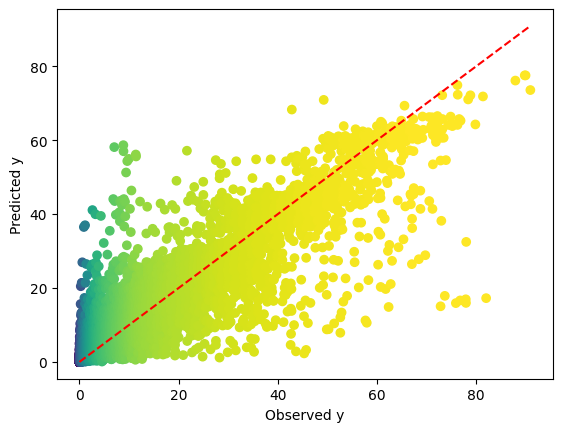

In [16]:
scatter_plot_pred(y_test, y_pred)

## get most indicative features

In [ ]:
from sklearn.inspection import permutation_importance

fn=['distance_to_5', 'distance_to_3','global_GC_content','local_GC_content_21','bulge-T', 'bulge-TTC','bulge-TTCTT','bulge-TTCTTCT','bulgesite',
              'mismatch_site_num', 'mismatch_num','mismatch_site_1','G_penalty_1','mismatch_site_2','G_penalty_2', 'editing_site_mismatch','is_toC','is_toG','is_out_of_ds']

def get_indicative_features(forest, X, y, features):
  result = permutation_importance(
    forest, X, y, n_repeats=10, random_state=229
  )

  forest_importance = pd.Series(result.importances_mean, index=features)

  fig, ax = plt.subplots()
  forest_importance.plot.bar(yerr=result.importances_std, ax=ax)
  ax.set_title("Feature importances using permutation on full model")
  ax.set_ylabel("Mean accuracy decrease")
  fig.tight_layout()

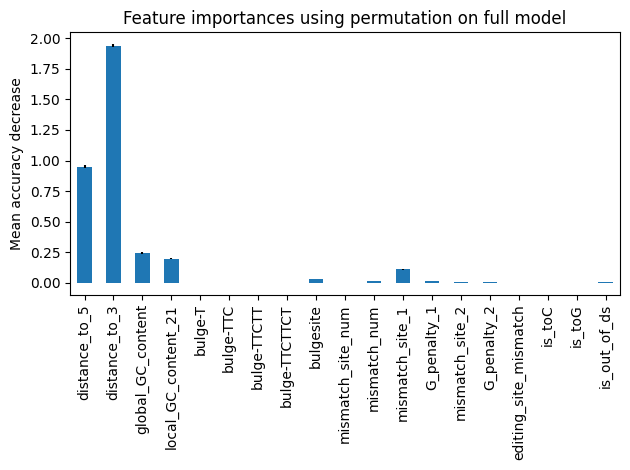

In [ ]:
# use permutation importance to avoid high cardinality feature problem
# global analysis


get_indicative_features(forest, X_test, y_test, fn)


# Model generalizability

In [ ]:
# load B2 and mNG dataset

filename_B2 = 'converted_new_GSM4705207_293T_B2_rep1.csv'
df_B2 = pd.read_csv(filename_B2)

filename_mNG = 'converted_new_GSM4705209_293T_mNG_rep1.csv'
df_mNG = pd.read_csv(filename_mNG)

In [ ]:
# permute indicies
permuted = np.random.permutation(len(df_B2))
df_train_B2 = df_B2.loc[list(permuted[0:round(len(df_B2)*0.7)])]
df_test_B2 = df_B2.loc[list(permuted[round(len(df_B2)*0.7):])]

x_train_B2, y_train_B2 = format_input(df_train_B2, dropcolumns = ['Unnamed: 0', 'comp_seq_ind','A_pos','y','delta_y'])
x_test_B2, y_test_B2 = format_input(df_test_B2, dropcolumns = ['Unnamed: 0', 'comp_seq_ind','A_pos','y','delta_y'])
x_test_mNG, y_test_mNG = format_input(df_mNG, dropcolumns = ['Unnamed: 0', 'comp_seq_ind','A_pos','y','delta_y'])

In [ ]:
# normalize input data to unit variance
scaler = StandardScaler()
scaler.fit(x_train)
X_train_B2 = scaler.transform(x_train_B2)
X_test_B2 = scaler.transform(x_test_B2)

scaler = StandardScaler()
scaler.fit(x_test_mNG)
X_test_mNG = scaler.transform(x_test_mNG)

In [ ]:
forest = RandomForestRegressor(n_estimators=50, criterion="squared_error", min_samples_leaf = 5,min_samples_split  = 5,max_depth     = 15, random_state = 229)
forest.fit(X_train_B2, y_train_B2)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=50, random_state=229)

In [ ]:
y_pred_B2 = forest.predict(X_test_B2)
y_pred_mNG = forest.predict(X_test_mNG)

In [ ]:
MSE_train_B2 = mean_squared_error(y_train_B2, forest.predict(X_train_B2))
print('MSE for train set on B2:', MSE_train_B2)

print('Accuracy socre for train set on B2', forest.score(X_train_B2, y_train_B2))

MSE for train set on B2: 5.283537807070316
Accuracy socre for train set on B2 0.9664931411063056


In [ ]:
MSE_test_B2 = mean_squared_error(y_test_B2, y_pred_B2)
print('MSE for test set on B2:', MSE_test_B2)

print('Accuracy socre for test set on B2', forest.score(X_test_B2, y_test_B2))

MSE for test set on B2: 7.866574239567628
Accuracy socre for test set on B2 0.9497351324066369


In [ ]:
MSE_test_mNG = mean_squared_error(y_test_mNG, y_pred_mNG)
print('MSE for test set on mNG:', MSE_test_mNG)
print('Accuracy socre for test set on mNG', forest.score(X_test_mNG, y_test_mNG))

MSE for test set on mNG: 240.70929675187708
Accuracy socre for test set on mNG -0.38959790540620753
